In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sn
import tensorflow as tf
import numpy as np

In [2]:
ap_data = pd.read_csv("ADANIPORTS.csv")
ap_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [3]:
nan_count = ap_data.isna().sum()
print('Nan count',nan_count)

Nan count Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


In [4]:
ap_data_z=ap_data.drop('Trades', axis=1)
ap_data_z['Prev Close'] = zscore(ap_data['Prev Close'])
ap_data_z['Open'] = zscore(ap_data['Open'])
ap_data_z['High'] = zscore(ap_data['High'])
ap_data_z['Low'] = zscore(ap_data['Low'])
ap_data_z['Last'] = zscore(ap_data['Last'])
ap_data_z['Close'] = zscore(ap_data['Close'])
ap_data_z['VWAP'] = zscore(ap_data['VWAP'])
ap_data_z['Volume'] = zscore(ap_data_z['Volume'])
ap_data_z

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,0.497054,2.196576,3.516790,2.292458,3.182670,3.205412,3.301480,5.931316,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,3.207675,3.302000,3.214657,2.843748,2.799565,2.847930,3.077861,0.396425,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,2.849991,2.914585,2.835731,2.668819,2.809919,2.797675,2.802904,0.528695,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,2.799708,2.816440,3.053519,2.928562,3.027357,2.991182,3.014862,0.403352,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,2.993324,3.073425,3.239835,3.098190,3.291389,3.238569,3.203086,0.005582,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,1.976258,2.005451,1.954006,2.074592,1.992975,2.002667,2.003986,1.568372,6.885658e+14,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,2.004251,2.015782,2.043891,2.066375,2.093410,2.097995,2.078388,4.293426,1.538191e+15,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,2.099633,2.119093,2.056480,2.139262,2.066489,2.082971,2.095673,1.998829,8.379106e+14,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,2.084600,2.109795,2.085938,2.151454,2.082021,2.085561,2.106199,2.655552,1.043139e+15,1304895,0.0942


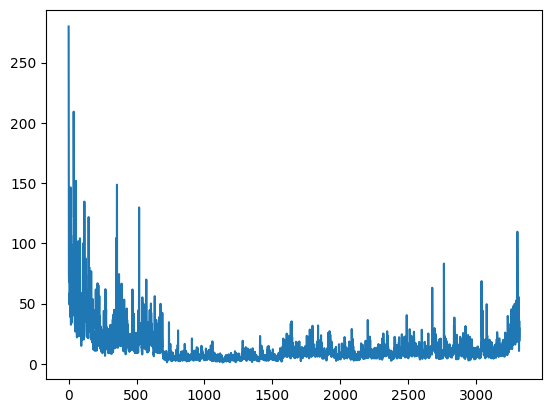

In [5]:
diff= ap_data['High']-ap_data['Low']
plt.plot(diff)
plt.show()

In [6]:
cr=ap_data_z.drop(['Date','Turnover','Symbol','Series'], axis=1)
cr_matrix=cr.corr()
cr_matrix

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.997228,0.995592,0.996221,0.995130,0.995193,0.995842,0.055715,-0.139582,-0.248207
Open,0.997228,1.000000,0.998697,0.998741,0.997855,0.997934,0.998748,0.060509,-0.135827,-0.249195
High,0.995592,0.998697,1.000000,0.997991,0.999045,0.999058,0.999504,0.068102,-0.131160,-0.254316
Low,0.996221,0.998741,0.997991,1.000000,0.998788,0.998904,0.999184,0.058525,-0.136498,-0.249176
Last,0.995130,0.997855,0.999045,0.998788,1.000000,0.999961,0.999605,0.066266,-0.131522,-0.253037
Close,0.995193,0.997934,0.999058,0.998904,0.999961,1.000000,0.999682,0.066464,-0.131466,-0.253569
VWAP,0.995842,0.998748,0.999504,0.999184,0.999605,0.999682,1.000000,0.064443,-0.133324,-0.253705
Volume,0.055715,0.060509,0.068102,0.058525,0.066266,0.066464,0.064443,1.000000,0.702409,-0.166870
Deliverable Volume,-0.139582,-0.135827,-0.131160,-0.136498,-0.131522,-0.131466,-0.133324,0.702409,1.000000,0.275753
%Deliverble,-0.248207,-0.249195,-0.254316,-0.249176,-0.253037,-0.253569,-0.253705,-0.166870,0.275753,1.000000


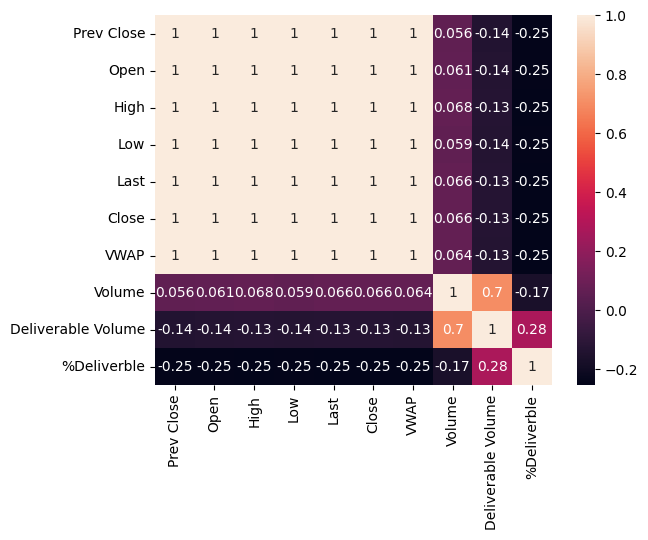

In [7]:
sn.heatmap(cr_matrix, annot=True)
plt.show()

In [8]:
ap_data_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   float64
 11  Turnover            3322 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 363.5+ KB


In [9]:
ap_data_z['Date'] = pd.to_datetime(ap_data_z['Date'])
ap_data_z.set_index('Date', inplace=True)
ap_data_z.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,0.497054,2.196576,3.516790,2.292458,3.182670,3.205412,3.301480,5.931316,2.687719e+15,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,3.207675,3.302000,3.214657,2.843748,2.799565,2.847930,3.077861,0.396425,4.312765e+14,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,2.849991,2.914585,2.835731,2.668819,2.809919,2.797675,2.802904,0.528695,4.550658e+14,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,2.799708,2.816440,3.053519,2.928562,3.027357,2.991182,3.014862,0.403352,4.283257e+14,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,2.993324,3.073425,3.239835,3.098190,3.291389,3.238569,3.203086,0.005582,2.875200e+14,816123,0.2741


In [10]:
data=ap_data_z.drop(['Symbol','Series','Turnover','Deliverable Volume','%Deliverble','Prev Close'],axis=1)
data.head()

,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,
2007-11-27,2.196576,3.516790,2.292458,3.182670,3.205412,3.301480,5.931316
2007-11-28,3.302000,3.214657,2.843748,2.799565,2.847930,3.077861,0.396425
2007-11-29,2.914585,2.835731,2.668819,2.809919,2.797675,2.802904,0.528695
2007-11-30,2.816440,3.053519,2.928562,3.027357,2.991182,3.014862,0.403352
2007-12-03,3.073425,3.239835,3.098190,3.291389,3.238569,3.203086,0.005582


In [11]:
data['price_change'] = data['Close'] - data['Open']
data['returns'] = data['Close'].pct_change()
data['average_price'] = (data['Close'] + data['Open']) / 2
data['price_range'] = data['High'] - data['Low']
data['volume_change'] = data['Volume'].diff()
data['price_volume_correlation'] = data['Close'].corr(data['Volume'])
data['returns_volume_correlation'] = data['returns'].corr(data['Volume'])
data['price_volume_covariance'] = data['Close'].cov(data['Volume'])
data['returns_volume_covariance'] = data['returns'].cov(data['Volume'])
data.head()

,Open,High,Low,Last,Close,VWAP,Volume,price_change,returns,average_price,price_range,volume_change,price_volume_correlation,returns_volume_correlation,price_volume_covariance,returns_volume_covariance
Date,,,,,,,,,,,,,,,,
2007-11-27,2.196576,3.516790,2.292458,3.182670,3.205412,3.301480,5.931316,1.008836,NaN,2.700994,1.224332,NaN,0.066464,-0.004994,0.066484,-0.008355
2007-11-28,3.302000,3.214657,2.843748,2.799565,2.847930,3.077861,0.396425,-0.454070,-0.111524,3.074965,0.370909,-5.534891,0.066464,-0.004994,0.066484,-0.008355
2007-11-29,2.914585,2.835731,2.668819,2.809919,2.797675,2.802904,0.528695,-0.116910,-0.017646,2.856130,0.166912,0.132270,0.066464,-0.004994,0.066484,-0.008355
2007-11-30,2.816440,3.053519,2.928562,3.027357,2.991182,3.014862,0.403352,0.174742,0.069167,2.903811,0.124957,-0.125343,0.066464,-0.004994,0.066484,-0.008355
2007-12-03,3.073425,3.239835,3.098190,3.291389,3.238569,3.203086,0.005582,0.165144,0.082706,3.155997,0.141645,-0.397770,0.066464,-0.004994,0.066484,-0.008355


In [12]:
data['exponential_moving_average_5'] = data['Close'].ewm(span=5).mean()
data['exponential_moving_average_10'] = data['Close'].ewm(span=10).mean()
data['exponential_moving_average_20'] = data['Close'].ewm(span=20).mean()
data['exponential_moving_average_12'] = data['Close'].ewm(span=12).mean()
data['exponential_moving_average_26'] = data['Close'].ewm(span=26).mean()
data['macd'] = data['exponential_moving_average_12'] - data['exponential_moving_average_26']
data['macd_signal'] = data['macd'].rolling(window=9).mean()

data['macd_histogram'] = data['macd'] - data['macd_signal']
data

,Open,High,Low,Last,Close,VWAP,Volume,price_change,returns,average_price,...,price_volume_covariance,returns_volume_covariance,exponential_moving_average_5,exponential_moving_average_10,exponential_moving_average_20,exponential_moving_average_12,exponential_moving_average_26,macd,macd_signal,macd_histogram
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2.196576,3.516790,2.292458,3.182670,3.205412,3.301480,5.931316,1.008836,NaN,2.700994,...,0.066484,-0.008355,3.205412,3.205412,3.205412,3.205412,3.205412,0.000000,NaN,NaN
2007-11-28,3.302000,3.214657,2.843748,2.799565,2.847930,3.077861,0.396425,-0.454070,-0.111524,3.074965,...,0.066484,-0.008355,2.990922,3.008797,3.017734,3.011776,3.019796,-0.008020,NaN,NaN
2007-11-29,2.914585,2.835731,2.668819,2.809919,2.797675,2.802904,0.528695,-0.116910,-0.017646,2.856130,...,0.066484,-0.008355,2.899384,2.923927,2.936929,2.928212,2.939990,-0.011778,NaN,NaN
2007-11-30,2.816440,3.053519,2.928562,3.027357,2.991182,3.014862,0.403352,0.174742,0.069167,2.903811,...,0.066484,-0.008355,2.937515,2.946084,2.952591,2.948089,2.954301,-0.006212,NaN,NaN
2007-12-03,3.073425,3.239835,3.098190,3.291389,3.238569,3.203086,0.005582,0.165144,0.082706,3.155997,...,0.066484,-0.008355,3.053086,3.030049,3.021767,3.027012,3.020224,0.006788,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2.005451,1.954006,2.074592,1.992975,2.002667,2.003986,1.568372,-0.002784,0.014168,2.004059,...,0.066484,-0.008355,2.012651,2.048954,2.044800,2.054974,2.015387,0.039588,0.094312,-0.054725
2021-04-27,2.015782,2.043891,2.066375,2.093410,2.097995,2.078388,4.293426,0.082213,0.047601,2.056889,...,0.066484,-0.008355,2.041099,2.057871,2.049866,2.061593,2.021506,0.040087,0.080518,-0.040431
2021-04-28,2.119093,2.056480,2.139262,2.066489,2.082971,2.095673,1.998829,-0.036122,-0.007161,2.101032,...,0.066484,-0.008355,2.055056,2.062434,2.053019,2.064882,2.026059,0.038823,0.069490,-0.030668


In [13]:
data.fillna(0,inplace=True)
nan_count = data.isna().sum()
print('Nan count',nan_count)

Nan count Open                             0
High                             0
Low                              0
Last                             0
Close                            0
VWAP                             0
Volume                           0
price_change                     0
returns                          0
average_price                    0
price_range                      0
volume_change                    0
price_volume_correlation         0
returns_volume_correlation       0
price_volume_covariance          0
returns_volume_covariance        0
exponential_moving_average_5     0
exponential_moving_average_10    0
exponential_moving_average_20    0
exponential_moving_average_12    0
exponential_moving_average_26    0
macd                             0
macd_signal                      0
macd_histogram                   0
dtype: int64


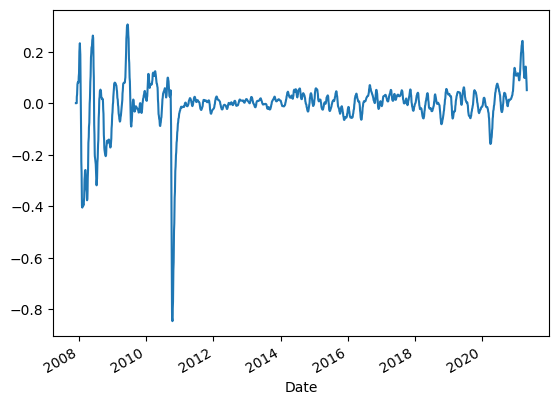

In [14]:
data['macd_signal'].plot()
data.to_csv('file.csv')

In [15]:
def xy_split(df,win_size):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-win_size):
        row=[r for r in df_as_np[i:i+win_size]]
        x.append(row)
        label = df_as_np[i+win_size][0]
        y.append(label)
    return np.array(x), np.array(y)

In [16]:
x,y=xy_split(data,6)
len(x)
x.shape,y.shape

((3316, 6, 24), (3316,))

In [17]:
y

array([3.69974608, 3.84438101, 3.90120188, ..., 2.11909284, 2.10979488,
       2.03644431])

In [18]:
x_train=x[:2500]
x_val= x[2500:3000]
x_test= x[3000:]

print('x_train:',x_train.shape)
print('x_val:',x_val.shape)
print('x_test:',x_test.shape)

x_train: (2500, 6, 24)
x_val: (500, 6, 24)
x_test: (316, 6, 24)


In [19]:
y_train=y[:2500]
y_val= y[2500:3000]
y_test= y[3000:]
print('y_train:',y_train.shape)
print('y_val:',y_val.shape)
print('y_test:',y_test.shape)
y[0].shape

y_train: (2500,)
y_val: (500,)
y_test: (316,)


()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()
model.add(InputLayer((6,24)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                22784     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 23313 (91.07 KB)
Trainable params: 23313 (91.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [23]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10

62/79 [======================>.......] - ETA: 0s - loss: 0.7653 - root_mean_squared_error: 0.8748INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 35ms/step - loss: 0.6890 - root_mean_squared_error: 0.8301 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0809
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1773 - root_mean_squared_error: 0.4211 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 3/10
53/79 [===================>..........] - ETA: 0s - loss: 0.0693 - root_mean_squared_error: 0.2632INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 25ms/step - loss: 0.0598 - root_mean_squared_error: 0.2445 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776
Epoch 4/10
54/79 [===================>..........] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2143INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 28ms/step - loss: 0.0393 - root_mean_squared_error: 0.1981 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 5/10
54/79 [===================>..........] - ETA: 0s - loss: 0.0331 - root_mean_squared_error: 0.1819INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 25ms/step - loss: 0.0301 - root_mean_squared_error: 0.1736 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 6/10
78/79 [============================>.] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1567INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 25ms/step - loss: 0.0246 - root_mean_squared_error: 0.1567 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0635
Epoch 7/10
53/79 [===================>..........] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.1378INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 29ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0611
Epoch 8/10
78/79 [============================>.] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1375INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 25ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545
Epoch 9/10
78/79 [============================>.] - ETA: 0s - loss: 0.0173 - root_mean_squared_error: 0.1316INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 25ms/step - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0507
Epoch 10/10
77/79 [============================>.] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1240INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 2s 30ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488


10/10 [==============================] - 0s 1ms/step


<Axes: >

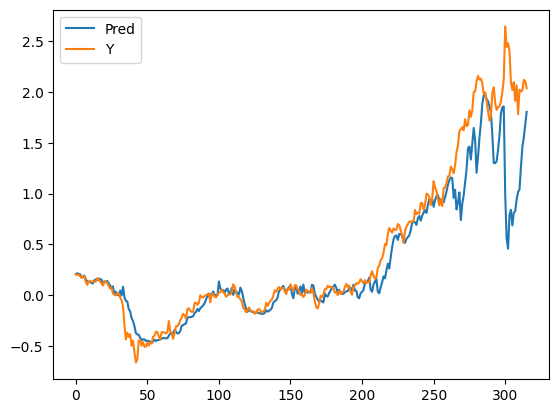

In [24]:
pred=model.predict(x_test).flatten()
test_r=pd.DataFrame(data={'Pred':pred,'Y':y_test})
test_r.plot()

<Axes: >

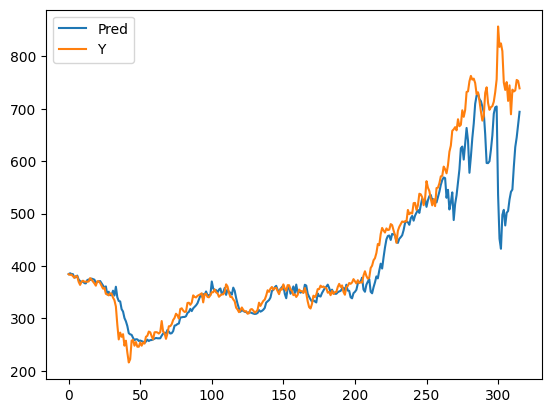

In [25]:
y_mean=np.mean(ap_data['Open'])
y_std=np.std(ap_data['Open'])
def postprocess(p):
    r=(p*y_std)+y_mean
    return r
post_pred=postprocess(pred)
post_y_test=postprocess(y_test)
test_r_post=pd.DataFrame(data={'Pred':post_pred,'Y':post_y_test})
test_r_post.plot()

<Axes: >

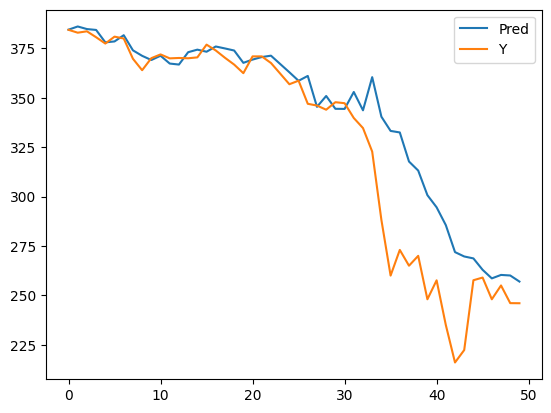

In [26]:
test_r_post[:50].plot()

In [27]:
test_r

,Pred,Y
0,0.205365,0.205004
1,0.213773,0.197514
2,0.207008,0.201130
3,0.204721,0.185634
4,0.172247,0.169104
...,...,...
311,1.264018,2.005451
312,1.457444,2.015782
313,1.552777,2.119093
314,1.683299,2.109795


<Axes: >

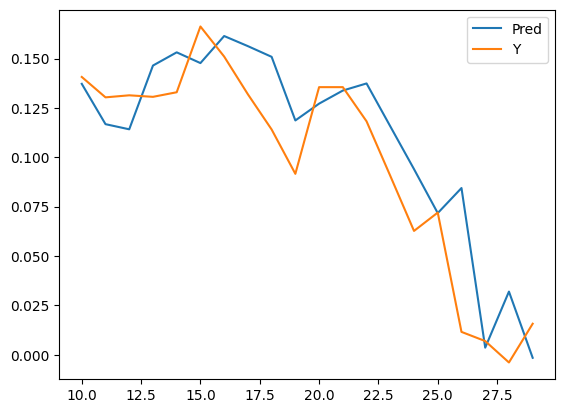

In [28]:
test_r[10:30].plot() 

In [29]:
mape = np.mean(np.abs((post_y_test - post_pred)/ post_y_test)) *100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

Mean Absolute Percentage Error (MAPE): 5.8576


In [30]:
mdape = np.median(np.abs((post_y_test - post_pred)/ post_y_test))*100
print(f"Median Absolute Percentage Error (MDAPE): {mdape:.4f}")

Median Absolute Percentage Error (MDAPE): 3.2644


In [31]:
def xy_split_2(df,win_size):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-win_size):
        row=[r for r in df_as_np[i:i+win_size]]
        x.append(row)
        label = df_as_np[i+win_size][4]
        y.append(label)
    return np.array(x), np.array(y)
x2,y2=xy_split_2(data,6)
len(x2)
x2.shape,y2.shape

((3316, 6, 24), (3316,))

In [32]:
x_train2=x2[:2500]
x_val2= x2[2500:3000]
x_test2= x2[3000:]
print('x_train2:',x_train2.shape)
print('x_val2:',x_val2.shape)
print('x_test2:',x_test2.shape)

y_train2=y2[:2500]
y_val2= y2[2500:3000]
y_test2= y2[3000:]
print('y_train2:',y_train2.shape)
print('y_val2:',y_val2.shape)
print('y_test2:',y_test2.shape)

x_train2: (2500, 6, 24)
x_val2: (500, 6, 24)
x_test2: (316, 6, 24)
y_train2: (2500,)
y_val2: (500,)
y_test2: (316,)


In [33]:
model2 = Sequential()
model2.add(InputLayer((6,24)))
model2.add(LSTM(64))
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                22784     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 23313 (91.07 KB)
Trainable params: 23313 (91.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
cp2=ModelCheckpoint('model2/',save_best_only=True)
model2.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [35]:
model.fit(x_train2,y_train2,validation_data=(x_val2,y_val2),epochs=10,callbacks=[cp])

Epoch 1/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0175 - root_mean_squared_error: 0.1323 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0577
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0165 - root_mean_squared_error: 0.1285 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0557
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss: 0.0033 - val_root_mean_sq

10/10 [==============================] - 0s 1ms/step


<Axes: >

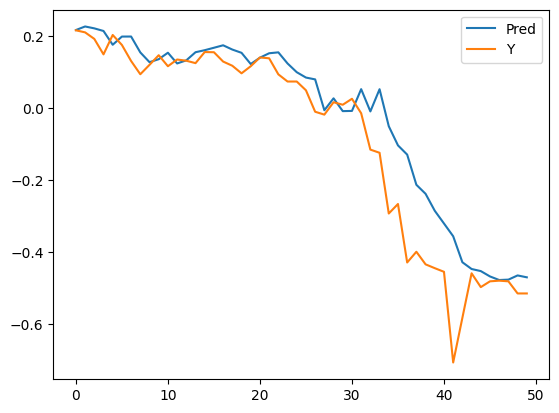

In [36]:
pred2=model.predict(x_test).flatten()
test_2=pd.DataFrame(data={'Pred':pred2,'Y':y_test2})
test_2[:50].plot()